# **1. Исходные данные**



Ссылка на датасет: https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset 

# **2. Импорт библиотек**

In [ ]:
import pandas
import matplotlib.pyplot as plt
import seaborn
import numpy
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import  KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import  MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
import os
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# **3. Загрузка данных в датафрейм**

Загрузим данные из нашего гугл-диска, с помощью библиотеки pandas, выведем первые 10 строк таблицы в подтверждение загрузки

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

data = pandas.read_csv("/content/drive/My Drive/ML/smoke_detection_iot.csv")
data.head(10)

MessageError: ignored

# 4. **Удаление лишних данных**
Столбцы Unnamed: 0, UTC и CNT не являются информативными, поэтому следует их удалить из датафрейма

In [ ]:
drop_columns = ['Unnamed: 0','UTC','CNT']
data.drop(drop_columns, axis = 1, inplace = True)

NameError: ignored

# **5. Удаление пропусков**
Проверим датафрейм на наличие пропусков в каких-либо полях

In [ ]:
print(data.isnull().sum())

NameError: ignored

# **6. Удаление дубликатов**
Проверим датафрейм на наличие дубликтов в каких-либо полях

In [ ]:
print("Количество дубликатов: ", data[data.duplicated()])
data = data.drop_duplicates()
data.shape

Количество дубликатов:         Temperature[C]  Humidity[%]  TVOC[ppb]  eCO2[ppm]  Raw H2  Raw Ethanol  \
57079           26.90        45.15         22        415   12846        20760   
57129           27.12        44.50         55        412   12832        20717   

       Pressure[hPa]  PM1.0  PM2.5  NC0.5  NC1.0  NC2.5  Fire Alarm  
57079        937.582   2.04   2.12  14.05  2.190  0.049           0  
57129        937.571   2.15   2.23  14.80  2.308  0.052           0  


(62628, 13)

# **7. Визуализация значимых признаков**

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,Fire Alarm
Temperature[C],1.000000,-0.243978,0.082449,0.079269,-0.135533,-0.037384,-0.251188,0.037333,0.032087,0.039294,0.031611,0.025528,-0.163871
Humidity[%],-0.243978,1.000000,-0.488883,-0.369098,0.247195,0.068807,0.694613,-0.236540,-0.178883,-0.277392,-0.174225,-0.118504,0.399842
TVOC[ppb],0.082449,-0.488883,1.000000,0.606117,-0.653058,-0.673731,-0.220013,0.597366,0.477424,0.670657,0.467386,0.344721,-0.214765
eCO2[ppm],0.079269,-0.369098,0.606117,1.000000,-0.682788,-0.506709,-0.326050,0.665482,0.572691,0.699604,0.564252,0.456323,-0.097017
Raw H2,-0.135533,0.247195,-0.653058,-0.682788,1.000000,0.631542,0.303084,-0.530717,-0.431081,-0.587771,-0.422628,-0.318520,0.106992
Raw Ethanol,-0.037384,0.068807,-0.673731,-0.506709,0.631542,1.000000,-0.075889,-0.480713,-0.393204,-0.529202,-0.385731,-0.293360,-0.340598
Pressure[hPa],-0.251188,0.694613,-0.220013,-0.326050,0.303084,-0.075889,1.000000,-0.258944,-0.243076,-0.248662,-0.241153,-0.213394,0.249770
PM1.0,0.037333,-0.236540,0.597366,0.665482,-0.530717,-0.480713,-0.258944,1.000000,0.956118,0.940045,0.949860,0.854901,-0.110562
PM2.5,0.032087,-0.178883,0.477424,0.572691,-0.431081,-0.393204,-0.243076,0.956118,1.000000,0.798872,0.999787,0.969382,-0.084924
NC0.5,0.039294,-0.277392,0.670657,0.699604,-0.587771,-0.529202,-0.248662,0.940045,0.798872,1.000000,0.786274,0.626711,-0.128129


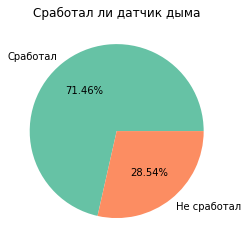

In [ ]:
total_sales = [len(data[data['Fire Alarm']==1]), len(data[data['Fire Alarm']==0])]
plt.pie(total_sales, labels=['Сработал', 'Не сработал'], colors=seaborn.color_palette('Set2'), autopct='%.2f%%')
plt.title("Сработал ли датчик дыма")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


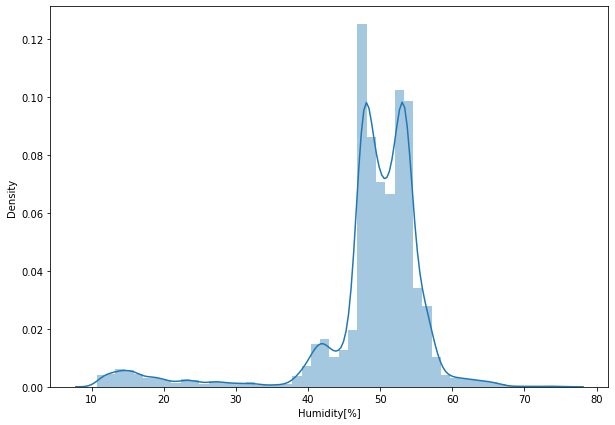

In [ ]:
plt.figure(figsize=(10,7))
seaborn.distplot(data['Humidity[%]'])
plt.show()

Text(0, 0.5, 'NC1.0')

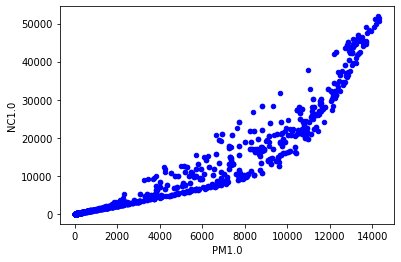

In [ ]:
data.plot(kind='scatter', x='PM1.0', y='NC1.0',color='b')
plt.xlabel('PM1.0')              
plt.ylabel('NC1.0')

Text(0, 0.5, 'eCO2[ppm]')

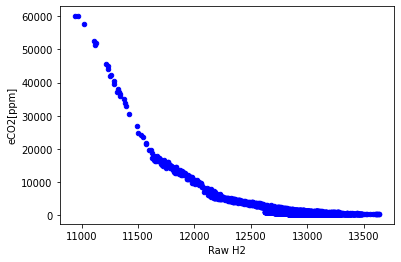

In [ ]:
data1 = data[data['Fire Alarm'] == 1]
data1.plot(kind='scatter', x='Raw H2', y='eCO2[ppm]',color='b')
plt.xlabel('Raw H2')              
plt.ylabel('eCO2[ppm]')

# **8. Обучение моделей**


In [ ]:
y = data['Fire Alarm']
x = data.drop(columns='Fire Alarm')
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Логистическая регрессия

logReg = LogisticRegression()
logReg.fit(X_train, y_train)

y_predLR = logReg.predict(X_test)

scoreLR = logReg.score(X_test, y_test)
print(scoreLR)
print(confusion_matrix(y_test, y_predLR))

0.893022513172601
[[2681  866]
 [ 474 8505]]


In [ ]:
#Метод k ближайших соседей

KNeighbors = KNeighborsClassifier(n_neighbors=1)
KNeighbors.fit(X_train, y_train)

y_predN = KNeighbors.predict(X_test)

scoreKNN = KNeighbors.score(X_test, y_test)
print(scoreKNN)
print(confusion_matrix(y_test, y_predN))

0.9988024908190963
[[3541    6]
 [   9 8970]]


In [ ]:
#SVM Метод опорных векторов

SVM = SVC(kernel='linear', class_weight='balanced')
SVM.fit(X_train, y_train)
y_predSVM = SVM.predict(X_test)

scoreSVM = SVM.score(X_test, y_test)
print(scoreSVM)
print(confusion_matrix(y_test,y_predSVM))

0.895497365479802
[[3354  193]
 [1116 7863]]


In [ ]:
#Дерево решений

trDis=tree.DecisionTreeClassifier()
trDis.fit(X_train, y_train)
y_predTR=trDis.predict(X_test)    

scoreTD=accuracy_score(y_test, y_predTR)
print(scoreTD)
print(confusion_matrix(y_test, y_predTR))

1.0
[[3547    0]
 [   0 8979]]


In [ ]:
#Случайный лес

randTree = RandomForestClassifier(n_estimators=10)
randTree.fit(X_train, y_train)
y_predRF = randTree.predict(X_test)

scoreRT=accuracy_score(y_test, y_predRF)
print(scoreRT)
print(confusion_matrix(y_test, y_predRF))

0.9998403321092129
[[3547    0]
 [   2 8977]]


In [ ]:
#Наивный байесовский классификатор

naive_bayes = GaussianNB()

naive_bayes.fit(X_train , y_train)
y_predNB = naive_bayes.predict(X_test)

scoreNB = accuracy_score(y_test , y_predNB)
print(scoreNB)
print(confusion_matrix(y_test, y_predNB))
print(classification_report(y_test,y_predNB))

0.7684017244132205
[[ 870 2677]
 [ 224 8755]]
              precision    recall  f1-score   support

           0       0.80      0.25      0.37      3547
           1       0.77      0.98      0.86      8979

    accuracy                           0.77     12526
   macro avg       0.78      0.61      0.62     12526
weighted avg       0.77      0.77      0.72     12526



1.0
[[3547    0]
 [   0 8979]]


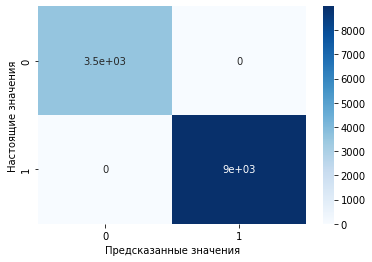

In [ ]:
# xgb
xgb_params = {'max_depth':[6, 8, 10], 'gamma':[0.1, 0.2], 'num_parallel_tree':[1,2,3]}
xgb = XGBClassifier(n_estimators=100)
xgb.fit(X_train, y_train)
y_predX = xgb.predict(X_test)
scoreXGB = accuracy_score(y_test , y_predX)
print(scoreXGB)
matr = confusion_matrix(y_test, y_predX)
print(matr)

ax = seaborn.heatmap(matr, annot=True, cmap='Blues')
ax.set_xlabel('Предсказанные значения')
ax.set_ylabel('Настоящие значения')
plt.show()


[Text(0, 0, 'Логистическая регрессия'),
 Text(0, 0, 'k ближайших соседей'),
 Text(0, 0, 'SVM Метод опорных векторов'),
 Text(0, 0, 'Дерево решений'),
 Text(0, 0, 'Случайный лес'),
 Text(0, 0, 'Наивный байесовский классификатор'),
 Text(0, 0, 'XGB')]

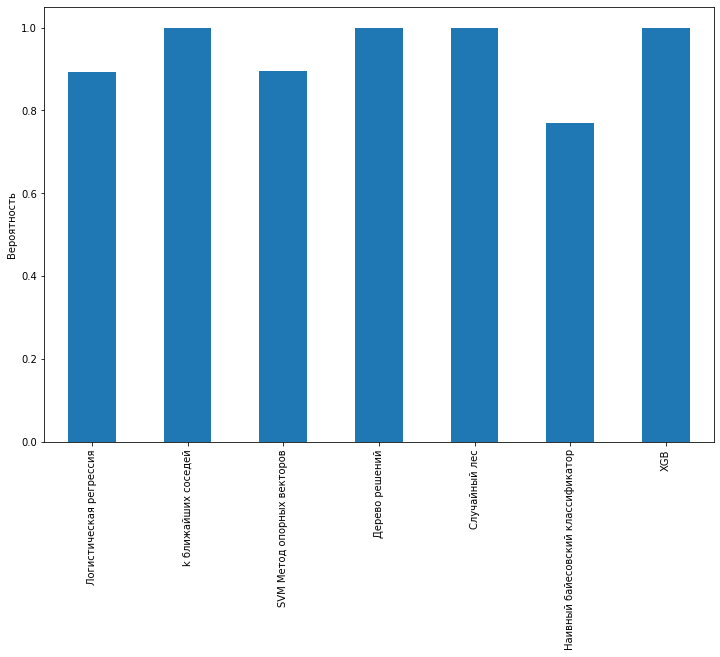

In [ ]:
frequencies = [scoreLR, scoreKNN, scoreSVM, scoreTD, scoreRT, scoreNB, scoreXGB]
freq_series = pandas.Series(frequencies)
x_labels = ['Логистическая регрессия', 'k ближайших соседей', 'SVM Метод опорных векторов', 'Дерево решений', 'Случайный лес', 'Наивный байесовский классификатор', 'XGB']
plt.figure(figsize=(12, 8))
fig = freq_series.plot(kind='bar')
fig.set_ylabel('Вероятность')
fig.set_xticklabels(x_labels)